In [1]:
import pandas as pd
import plotly.express as px

In [2]:
df = pd.read_csv("shopping_behavior_updated.csv")

In [3]:
sizes_to_keep = ["S", "M", "L", "XL"]
df_sizes = df[df["Size"].isin(sizes_to_keep)].copy()

In [4]:
df_sizes["Category"] = (
    df_sizes["Category"]
    .astype(str)
    .str.strip()      
    .str.title()      
)

In [5]:
size_counts = (
    df_sizes
    .groupby(["Category", "Size"])
    .agg(Count=("Customer ID", "size"))  
    .reset_index()
)


In [6]:
size_counts["Percent of Category"] = (
    size_counts["Count"]
    / size_counts.groupby("Category")["Count"].transform("sum")
)


In [7]:

fig = px.treemap(
    size_counts,
    path=["Category", "Size"],       
    values="Count",                   
    color="Category",                 
    hover_data={                     
        "Percent of Category": ":.1%" 
    }
)


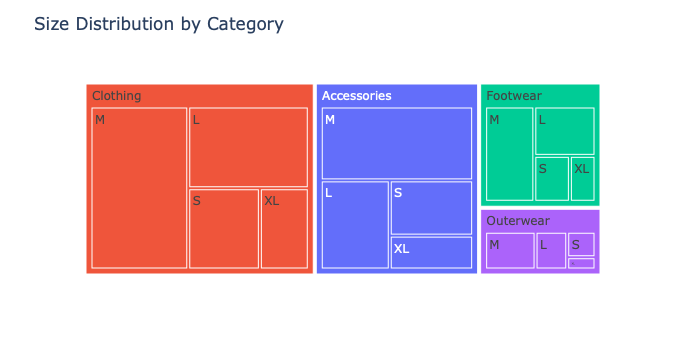

In [9]:
fig.update_traces(
    textinfo="label",                 
    hovertemplate=(
        "Category: %{parent}<br>" +
        "Size: %{label}<br>" +
        "Count: %{value}<br>" +
        "Percent of Category: %{customdata[0]:.1%}<extra></extra>"
    )
)


fig.update_layout(
    title="Size Distribution by Category"
)

fig.show()